In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

In [50]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1


In [51]:
import os
import pandas as pd

csv_file = os.path.join(path, "Mall_Customers.csv")
df = pd.read_csv(csv_file)
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


**Pre processing**

In [52]:
print("Missing values per column:")
print(df.isnull().sum())

print("\nData Information:")
print(df.info())


Missing values per column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [53]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
print(df.head())

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0           1   19                  15                      39         True
1           2   21                  15                      81         True
2           3   20                  16                       6        False
3           4   23                  16                      77        False
4           5   31                  17                      40        False


In [54]:
df = df.drop_duplicates()

**Exploratory Data Analysis (EDA)**

In [55]:
print("Summary Statistics:")
print(df.describe())


Summary Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


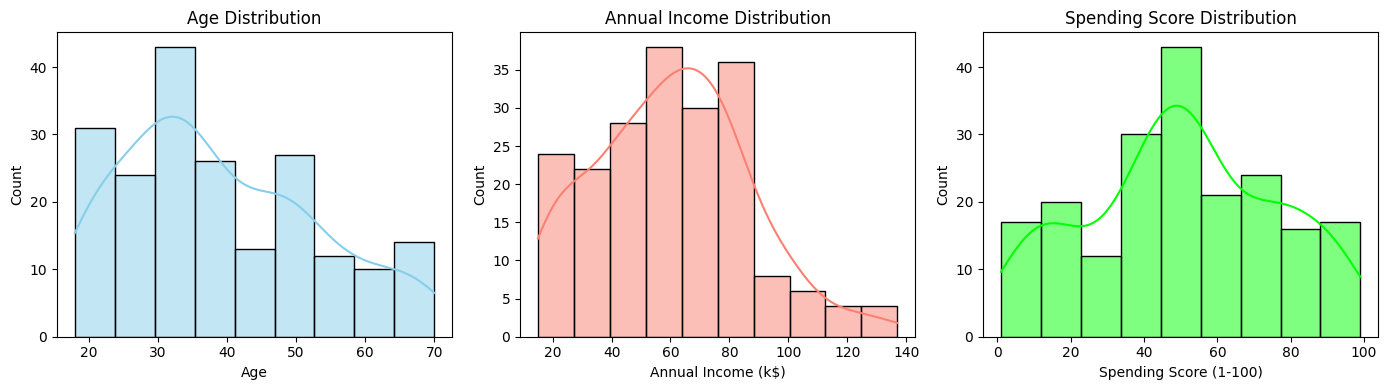

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True, color='salmon')
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True, color='lime')
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()


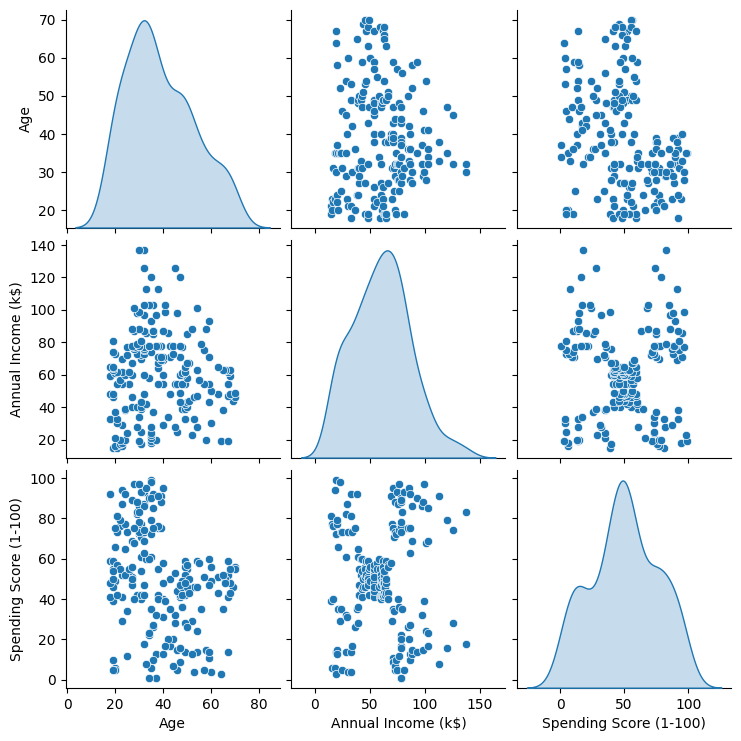

In [57]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], diag_kind='kde')
plt.show()`

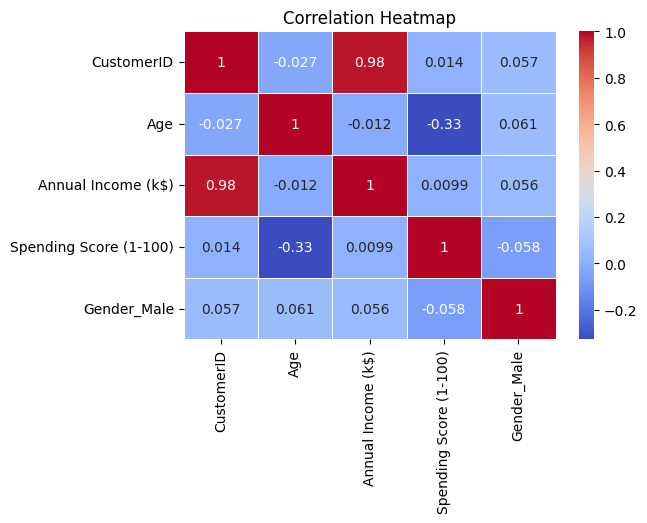

In [58]:
corr_matrix = df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**Apply Statistical Methods**

In [59]:
from sklearn.linear_model import LinearRegression

X = df[['Age', 'Annual Income (k$)']]
y = df['Spending Score (1-100)']

reg_model = LinearRegression()
reg_model.fit(X, y)

print("Regression coefficients:", reg_model.coef_)
print("Intercept:", reg_model.intercept_)

predictions = reg_model.predict(X.head())
print("Predicted Spending Scores for first 5 rows:", predictions)


Regression coefficients: [-0.60478726  0.00574856]
Intercept: 73.34785222186397
Predicted Spending Scores for first 5 rows: [61.94312271 60.73354819 61.34408401 59.52972224 54.69717273]


In [72]:
from sklearn.preprocessing import StandardScaler

features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
features.head()

# scaler = StandardScaler()
# features_scaled = scaler.fit_transform(features)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])

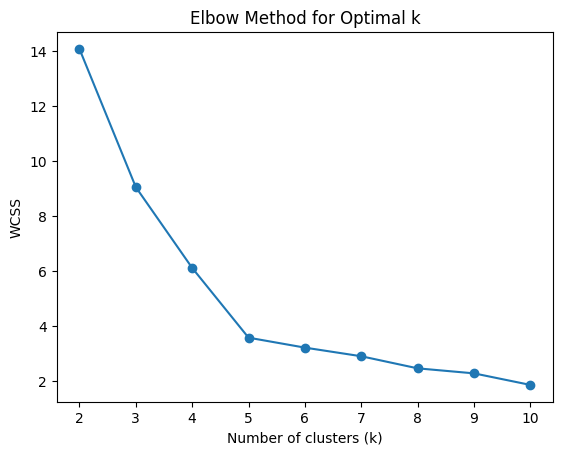

In [73]:
from sklearn.cluster import KMeans

# sse = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
#     kmeans.fit(features_scaled)
#     sse.append(kmeans.inertia_)

# plt.figure(figsize=(6, 4))
# plt.plot(range(1, 11), sse, marker='o')
# plt.title('Elbow Method to Determine Optimal k')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Sum of Squared Errors (SSE)')
# plt.show()

wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

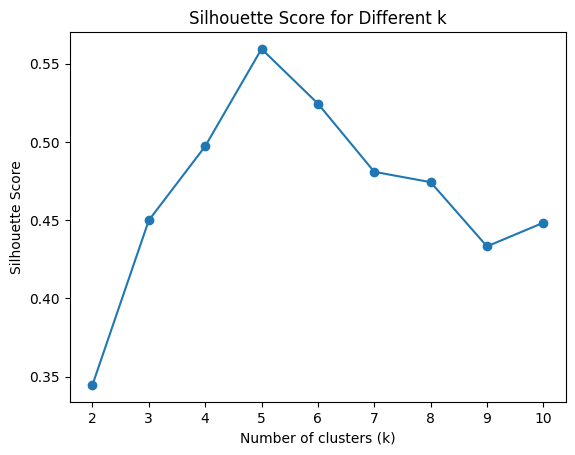

In [75]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, labels))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.show()

In [81]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

print("Data with Cluster Labels:")
print(df.head())


Data with Cluster Labels:
   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male  \
0           1   19                  15                      39         True   
1           2   21                  15                      81         True   
2           3   20                  16                       6        False   
3           4   23                  16                      77        False   
4           5   31                  17                      40        False   

   Cluster  
0        1  
1        1  
2        0  
3        1  
4        1  


**Visualize Key Findings**

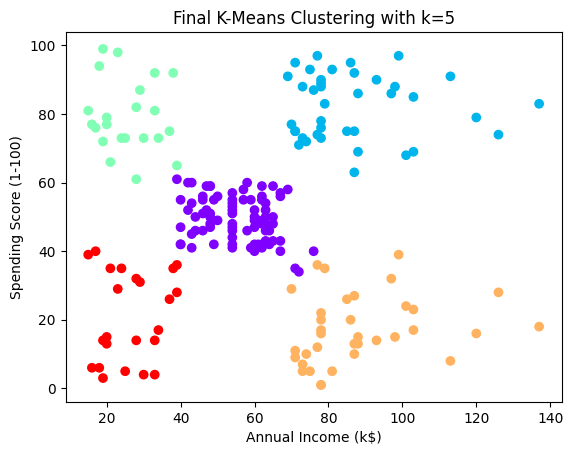

In [87]:
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='rainbow')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title(f"Final K-Means Clustering with k={best_k}")
plt.show()

In [91]:
from sklearn.metrics import silhouette_score

final_labels = kmeans.labels_
final_score = silhouette_score(df_scaled, final_labels)

print(f'Silhouette Score for final clusters: {final_score:.4f}')


Silhouette Score for final clusters: 0.4432


In [92]:
import plotly.express as px

fig = px.scatter(df,
                 x='Annual Income (k$)',
                 y='Spending Score (1-100)',
                 color='Cluster',
                 title='Interactive Customer Segments',
                 labels={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'})
fig.show()


In [95]:
# Ensure the 'Cluster' column is of type string
df['Cluster'] = df['Cluster'].astype(str)

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap
from bokeh.palettes import Category10  # Import a palette with sufficient colors

output_notebook()

source = ColumnDataSource(df)

# Use a palette with at least as many colors as unique clusters
unique_clusters = sorted(df['Cluster'].unique())
colors = Category10[len(unique_clusters)]  # Select the first N colors from the palette

p = figure(title="Bokeh: Customer Segments",
           x_axis_label='Annual Income (k$)',
           y_axis_label='Spending Score (1-100)',
           width=700,  # Updated parameter name
           height=500)  # Updated parameter name

p.circle(x='Annual Income (k$)',
         y='Spending Score (1-100)',
         source=source,
         size=10,
         color=factor_cmap('Cluster', palette=colors, factors=unique_clusters),
         legend_field='Cluster')

p.legend.title = 'Cluster'
p.legend.location = "top_left"

show(p)

